In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data/train_data/train_task_3_4.csv')

In [3]:
answer_meta = pd.read_csv('data/metadata/answer_metadata_task_3_4.csv')

In [4]:
new_df = data.merge(answer_meta, on='AnswerId', how='left')
notnull_confidence = new_df[new_df['Confidence'].notnull()]

notnull_confidence

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId
1,767,3062,55638,1,3,3,2019-10-27 20:54:00.000,25.0,115,39,52562.0
6,932,3923,6545,0,4,3,2019-10-02 16:20:00.000,25.0,112,57,52562.0
12,405,1506,1268566,1,2,2,2019-12-19 18:24:00.000,100.0,210,64,52562.0
13,78,944,85177,1,3,3,2020-01-27 16:50:00.000,100.0,53,30,NaN
16,11,5482,648990,0,2,3,2019-11-24 16:20:00.000,50.0,95,109,52562.0
...,...,...,...,...,...,...,...,...,...,...,...
1382705,222,1048,185768,0,4,3,2019-10-08 16:21:00.000,50.0,260,18,52562.0
1382707,596,5579,387573,0,2,1,2019-10-23 13:39:00.000,25.0,288,32,52562.0
1382709,276,2213,884965,0,4,3,2019-11-26 20:16:00.000,25.0,360,62,52562.0
1382712,300,4605,802606,0,4,3,2019-12-01 18:24:00.000,100.0,24,25,52562.0


In [5]:
grouped_data = new_df.groupby('QuestionId').agg(
    count = pd.NamedAgg(column='IsCorrect', aggfunc='count'),
                mean = pd.NamedAgg(column='IsCorrect', aggfunc='mean'),
                sem = pd.NamedAgg(column='IsCorrect', aggfunc='sem'),
                confidence=pd.NamedAgg(column='Confidence', aggfunc='mean')
            ).reset_index()

grouped_data.head()

,QuestionId,count,mean,sem,confidence
0,0,2812,0.443457,0.009370,66.176471
1,1,14,0.571429,0.137253,NaN
2,2,2313,0.385214,0.010121,66.201354
3,3,2672,0.808757,0.007610,85.021246
4,4,1704,0.401408,0.011878,59.343434


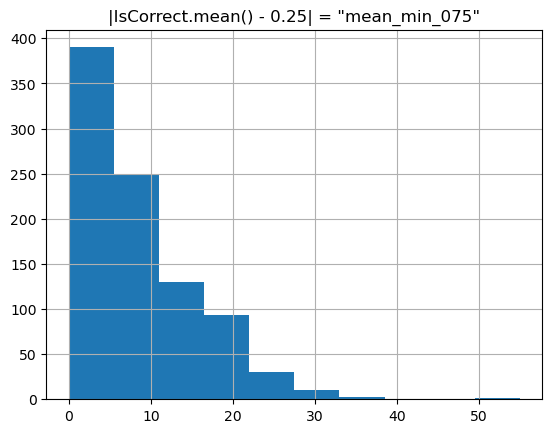

In [133]:
grouped_data['confidence_mean'] = abs(grouped_data['confidence'] - 80)

plt.title('|confidence.mean() - 80| = "confidence_mean"')
grouped_data['confidence_mean'].hist()
plt.show()

In [155]:
# sort by confidence - 80
csort = grouped_data.sort_values(by='confidence_mean', ascending=True)

csort.head(n=10)

,QuestionId,count,mean,sem,confidence,confidence_mean
240,240,111,0.360360,0.045776,80.000000,0.000000
102,102,179,0.446927,0.037265,80.000000,0.000000
482,482,321,0.632399,0.026953,80.000000,0.000000
446,446,2667,0.461942,0.009656,79.994357,0.005643
259,259,1731,0.585789,0.011843,80.013369,0.013369
788,788,2594,0.662298,0.009287,80.020776,0.020776
926,926,2592,0.607639,0.009593,79.957627,0.042373
764,764,2941,0.652159,0.008784,79.949495,0.050505
83,83,2905,0.534251,0.009257,80.071813,0.071813
750,750,1689,0.528123,0.012151,79.907407,0.092593


In [156]:
csort['score'] = csort['confidence_mean'].rank(ascending=True)

confidence_sort = csort.sort_values(by='confidence_mean', ascending=False)

confidence_sort

,QuestionId,count,mean,sem,confidence,confidence_mean,score
548,548,10,0.400000,0.163299,25.000000,55.000000,904.0
775,775,80,0.325000,0.052696,45.000000,35.000000,903.0
932,932,2384,0.359060,0.009827,45.764192,34.235808,902.0
532,532,318,0.481132,0.028063,47.115385,32.884615,901.0
273,273,861,0.292683,0.015515,47.286822,32.713178,900.0
...,...,...,...,...,...,...,...
847,847,4,1.000000,0.000000,NaN,NaN,NaN
860,860,15,0.466667,0.133333,NaN,NaN,NaN
897,897,9,0.444444,0.175682,NaN,NaN,NaN
905,905,5,0.400000,0.244949,NaN,NaN,NaN


# 예시 평가 데이터

In [157]:
df_merged = confidence_sort

In [158]:
df_merged['rank'] = df_merged['score'].rank(ascending=False)

result = df_merged.sort_values('rank', ascending=True)

result['rank'] = range(1, len(result) + 1)

result

,QuestionId,count,mean,sem,confidence,confidence_mean,score,rank
548,548,10,0.400000,0.163299,25.000000,55.000000,904.0,1
775,775,80,0.325000,0.052696,45.000000,35.000000,903.0,2
932,932,2384,0.359060,0.009827,45.764192,34.235808,902.0,3
532,532,318,0.481132,0.028063,47.115385,32.884615,901.0,4
273,273,861,0.292683,0.015515,47.286822,32.713178,900.0,5
...,...,...,...,...,...,...,...,...
847,847,4,1.000000,0.000000,NaN,NaN,NaN,944
860,860,15,0.466667,0.133333,NaN,NaN,NaN,945
897,897,9,0.444444,0.175682,NaN,NaN,NaN,946
905,905,5,0.400000,0.244949,NaN,NaN,NaN,947


In [159]:
template = pd.read_csv('submission/template.csv')
template.head()

,QuestionId,ranking
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,NaN


In [160]:
df1 = result
df2 = template

merged_df = pd.merge(df2, df1[['QuestionId', 'rank']], on='QuestionId', how='left')
merged_df = merged_df.drop('ranking', axis=1)
merged_df = merged_df.rename(columns={'rank': 'ranking'})

merged_df

,QuestionId,ranking
0,0,191
1,1,905
2,2,195
3,3,538
4,4,63
...,...,...
943,943,630
944,944,300
945,945,410
946,946,397


In [161]:
merged_df.to_csv('20192665.csv', index=False)

## Test
by private

In [162]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
eval_test.head()

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


In [163]:
eval_test['1count'] = (eval_test[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 1).sum(axis=1)
eval_test['2count'] = (eval_test[["T1_ALR", "T2_CL", "T3_GF", "T4_MQ", "T5_NS"]] == 2).sum(axis=1)

eval_test.head(5)

,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS,1count,2count
0,15,15,145,762,2,2,2,2.0,2,0,5
1,31,31,307,208,1,1,1,2.0,1,4,1
2,25,25,278,195,1,1,1,1.0,1,5,0
3,3,3,13,153,2,2,2,2.0,2,0,5
4,40,40,23,100,2,1,1,1.0,1,4,1


<AxesSubplot:>

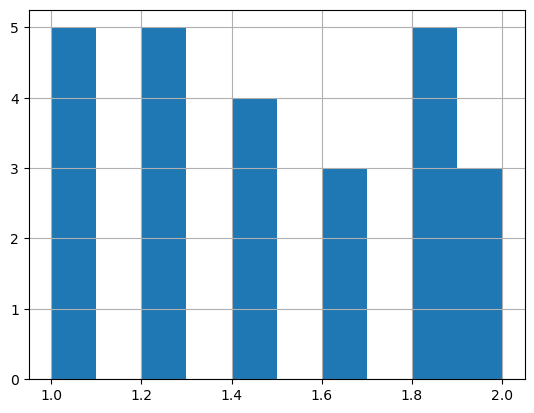

In [164]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()

In [165]:
test_preference = []

for idx in range(len(eval_test)):
    if eval_test['1count'][idx] > eval_test['2count'][idx]:
        test_preference.append(1)
    
    else :
        test_preference.append(2)

test_preference

[2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2]

In [166]:
def preference(truth):
    left = list(truth.left)
    right = list(truth.right)
    
    truth_left = []
    truth_right = []
    truth_preference = []
    
    for idx in range(len(left)):
        truth_left.append(left[idx])
        truth_right.append(right[idx])

In [167]:
submission = pd.read_csv('20192665.csv')

submission.head()

,QuestionId,ranking
0,0,191
1,1,905
2,2,195
3,3,538
4,4,63


In [168]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    return submission_preference
    
submission_preference = evaluate(eval_test, submission)

In [169]:
submission_preference

[2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1]

<AxesSubplot:>

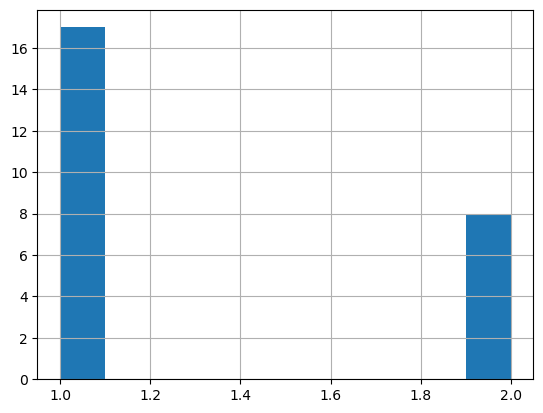

In [170]:
submission_df = pd.DataFrame({'score': submission_preference})
submission_df['score'].hist()

<AxesSubplot:>

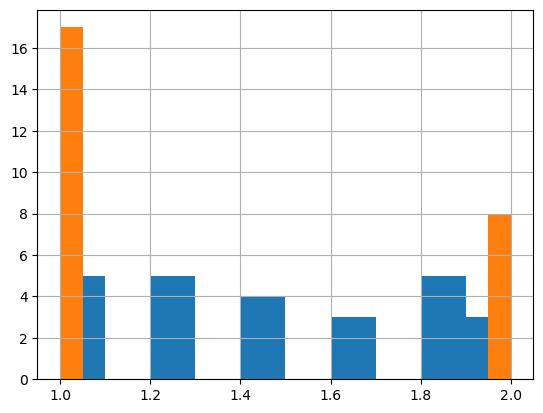

In [171]:
eval_test['score'].hist()
submission_df['score'].hist(bins=20)

In [172]:
count = 0

for i in range(len(test_preference)):
    if test_preference[i] == submission_preference[i]:
        count += 1

print("전문가 의견과 내 모델의 일치율은", int(count/25 * 100), "% 입니다.")


전문가 의견과 내 모델의 일치율은 56 % 입니다.


In [173]:
count

14

In [153]:
result_df = pd.DataFrame({'test_preference': test_preference, 'submission_preference': submission_preference})

result_df['compare'] = (result_df['test_preference'] == result_df['submission_preference']).astype(int)

result_df

,test_preference,submission_preference,compare
0,2,2,1
1,1,1,1
2,1,2,0
3,2,1,0
4,1,1,1
5,1,1,1
6,1,2,0
7,1,1,1
8,1,1,1
9,2,1,0


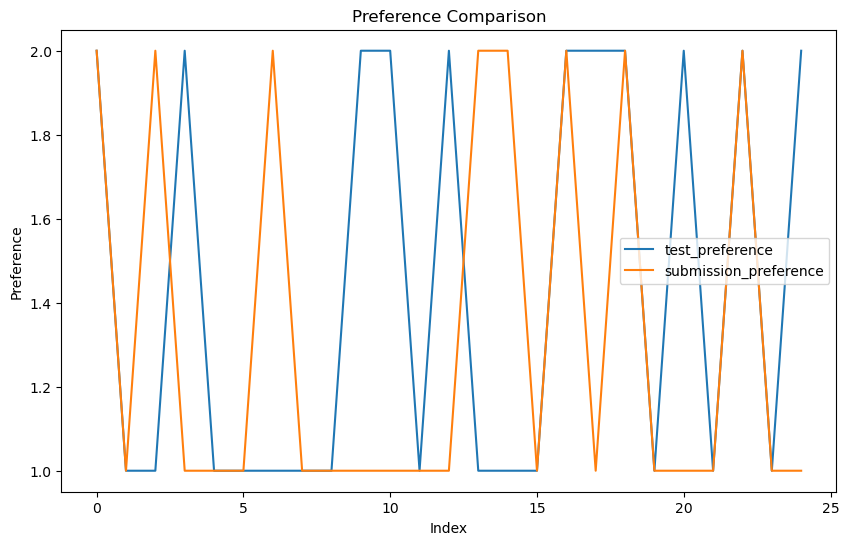

In [154]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(result_df.index, result_df['test_preference'], label='test_preference')
plt.plot(result_df.index, result_df['submission_preference'], label='submission_preference')

plt.title('Preference Comparison')
plt.xlabel('Index')
plt.ylabel('Preference')

plt.legend()

plt.show()